GANs application on MNIST data

Epoch [1/50] | D Loss: 0.4072 G Loss: 5.8151
Epoch [2/50] | D Loss: 0.8275 G Loss: 1.9025
Epoch [3/50] | D Loss: 0.3355 G Loss: 3.1924
Epoch [4/50] | D Loss: 0.3095 G Loss: 2.5353
Epoch [5/50] | D Loss: 1.1399 G Loss: 4.5115
Epoch [6/50] | D Loss: 0.0836 G Loss: 5.0631
Epoch [7/50] | D Loss: 0.2093 G Loss: 5.6933
Epoch [8/50] | D Loss: 0.1032 G Loss: 3.1998
Epoch [9/50] | D Loss: 0.0944 G Loss: 5.3101
Epoch [10/50] | D Loss: 0.1362 G Loss: 4.4097


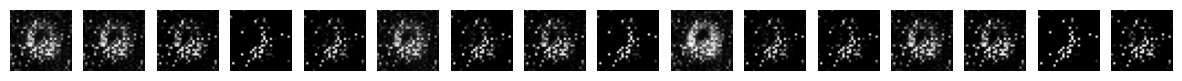

Epoch [11/50] | D Loss: 0.4856 G Loss: 5.0273
Epoch [12/50] | D Loss: 0.3006 G Loss: 4.5188
Epoch [13/50] | D Loss: 0.2862 G Loss: 3.6752
Epoch [14/50] | D Loss: 0.2160 G Loss: 4.3469
Epoch [15/50] | D Loss: 0.2777 G Loss: 5.5074
Epoch [16/50] | D Loss: 0.4150 G Loss: 3.2759
Epoch [17/50] | D Loss: 0.1439 G Loss: 3.9105
Epoch [18/50] | D Loss: 0.4715 G Loss: 4.2661
Epoch [19/50] | D Loss: 0.1408 G Loss: 4.6209
Epoch [20/50] | D Loss: 0.3146 G Loss: 3.4136


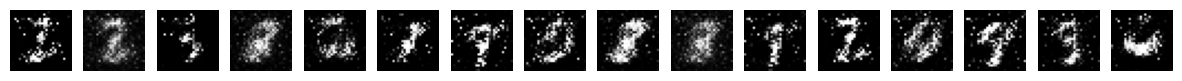

Epoch [21/50] | D Loss: 0.2195 G Loss: 5.3501
Epoch [22/50] | D Loss: 0.5150 G Loss: 3.4582
Epoch [23/50] | D Loss: 0.3957 G Loss: 4.6965
Epoch [24/50] | D Loss: 0.2966 G Loss: 3.5140
Epoch [25/50] | D Loss: 0.4572 G Loss: 2.8178
Epoch [26/50] | D Loss: 0.4420 G Loss: 3.1415
Epoch [27/50] | D Loss: 0.5381 G Loss: 3.0173
Epoch [28/50] | D Loss: 0.5838 G Loss: 2.3516
Epoch [29/50] | D Loss: 0.6228 G Loss: 3.5959
Epoch [30/50] | D Loss: 0.3435 G Loss: 3.3523


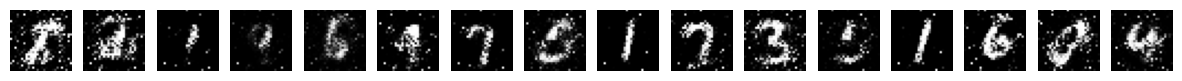

Epoch [31/50] | D Loss: 0.5415 G Loss: 3.1462
Epoch [32/50] | D Loss: 0.6541 G Loss: 2.4452
Epoch [33/50] | D Loss: 0.6345 G Loss: 1.8813
Epoch [34/50] | D Loss: 0.7907 G Loss: 2.5418
Epoch [35/50] | D Loss: 0.5632 G Loss: 2.2537
Epoch [36/50] | D Loss: 0.6579 G Loss: 2.4665
Epoch [37/50] | D Loss: 0.5633 G Loss: 3.0933
Epoch [38/50] | D Loss: 0.4838 G Loss: 2.5307
Epoch [39/50] | D Loss: 0.9832 G Loss: 2.2812
Epoch [40/50] | D Loss: 0.6343 G Loss: 2.1015


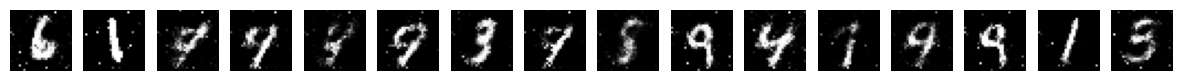

Epoch [41/50] | D Loss: 0.7602 G Loss: 2.9579
Epoch [42/50] | D Loss: 0.6798 G Loss: 1.6397
Epoch [43/50] | D Loss: 0.4967 G Loss: 2.3619
Epoch [44/50] | D Loss: 0.9346 G Loss: 1.3091
Epoch [45/50] | D Loss: 0.7989 G Loss: 2.3880
Epoch [46/50] | D Loss: 1.1427 G Loss: 2.0475
Epoch [47/50] | D Loss: 0.6910 G Loss: 1.6584
Epoch [48/50] | D Loss: 0.7478 G Loss: 1.8733
Epoch [49/50] | D Loss: 0.7980 G Loss: 1.6633
Epoch [50/50] | D Loss: 1.0637 G Loss: 1.8837


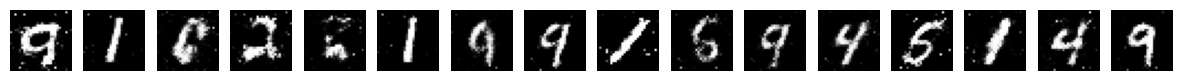

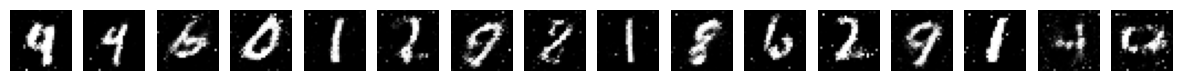

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load and Prepare MNIST Dataset
# MNIST: data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Normalize to range [-1, 1]
])

# Load dataset
batch_size = 64
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the Generator
# The Generator takes random noise as input and produces a 28x28 image
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 784),
            nn.Tanh() # Output in range [-1, 1]
        )

    def forward(self, z):
        return self.model(z).view(z.size(0), 1, 28, 28)

latent_dim = 100
generator = Generator(latent_dim).to("cuda" if torch.cuda.is_available() else "cpu")

# Define the Discriminator
# The Discriminator takes an image as input and outputs the probability of it being real
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(784, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 1),
            nn.Sigmoid() # Output probability
        )

    def forward(self, x):
        x = x.view(x.size(0), -1) # Flatten the image
        return self.model(x)

discriminator = Discriminator().to("cuda" if torch.cuda.is_available() else "cpu")

# Define Loss Function and Optimizers
# Use Binary Cross-Entropy (BCE) loss for both models
criterion = nn.BCELoss()

lr = 0.0002
generator_optimizer = optim.Adam(generator.parameters(), lr=lr)
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=lr)

device = "cuda" if torch.cuda.is_available() else "cpu"
# Training the loop
def train_gan(generator, discriminator, train_loader, epochs, latent_dim):
    for epoch in range(epochs):
        for real_images, _ in train_loader:
            batch_size = real_images.size(0)
            real_images = real_images.to(device)

            # Labels
            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)

            # Train Discriminator
            discriminator_optimizer.zero_grad()

            # Loss for real images
            real_outputs = discriminator(real_images)
            real_loss = criterion(real_outputs, real_labels)

            # Generate fake images
            noise = torch.randn(batch_size, latent_dim).to(device)
            fake_images = generator(noise)

            # Loss for fake images
            fake_outputs = discriminator(fake_images.detach())
            fake_loss = criterion(fake_outputs, fake_labels)

            # Total Discriminator loss
            d_loss = real_loss + fake_loss
            d_loss.backward()
            discriminator_optimizer.step()

            # Train Generator
            generator_optimizer.zero_grad()

            # Generate fake images and calculate loss
            fake_outputs = discriminator(fake_images)
            g_loss = criterion(fake_outputs, real_labels) # Fool the discriminator

            g_loss.backward()
            generator_optimizer.step()

        # Print losses for the current epoch
        print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} G Loss: {g_loss.item():.4f}")

        # Visualize generated images
        if (epoch + 1) % 10 == 0:
            visualize_images(generator, latent_dim)

# Visualization Function
def visualize_images(generator, latent_dim, num_images=16):
    generator.eval()
    noise = torch.randn(num_images, latent_dim).to(device)
    generated_images = generator(noise).detach().cpu()

    # Plot Images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    if num_images == 1:
        axes.imshow(generated_images[0].squeeze(), cmap="gray")
        axes.axis("off")
    else:
        for i in range(num_images):
            axes[i].imshow(generated_images[i].squeeze(), cmap="gray")
            axes[i].axis("off")
    plt.show()
    generator.train()

# Run the Training
epochs = 50
train_gan(generator, discriminator, train_loader, epochs, latent_dim)

# Generate and Visualize New Images (Post-Training)
def generate_images(generator, latent_dim, num_images=16):
    generator.eval()
    noise = torch.randn(num_images, latent_dim).to(device)
    generated_images = generator(noise).detach().cpu()

    # Plot images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    for i in range(num_images):
        axes[i].imshow(generated_images[i].squeeze(), cmap="gray")
        axes[i].axis("off")
    plt.show()

generate_images(generator, latent_dim)

Changing num of epocs from 50 to 100 & replacing fully connected layers with convolutional layers for better image generation


---
By changing simple GAN to deep convolutonal GAN & replacing FC layers with Convolutional layers the noise of images was reduced alot & the results showed better images then before
Tuning hyperparameters for Adam optimizer also improved stability of Convolutional GANs


Starting training on cuda
Epoch [1/100] | D Loss: 0.5266 G Loss: 1.6174
Epoch [2/100] | D Loss: 0.5897 G Loss: 3.0644
Epoch [3/100] | D Loss: 0.5977 G Loss: 0.8570
Epoch [4/100] | D Loss: 0.2580 G Loss: 3.1734
Epoch [5/100] | D Loss: 0.3701 G Loss: 1.9030
Epoch [6/100] | D Loss: 0.0995 G Loss: 3.6777
Epoch [7/100] | D Loss: 0.1767 G Loss: 2.4366
Epoch [8/100] | D Loss: 0.4387 G Loss: 2.0169
Epoch [9/100] | D Loss: 0.1255 G Loss: 4.4039
Epoch [10/100] | D Loss: 0.1596 G Loss: 3.8811


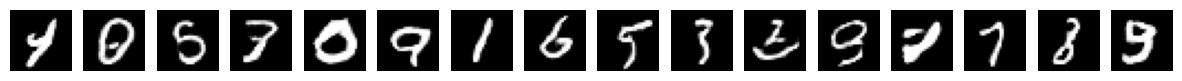

Epoch [11/100] | D Loss: 0.4426 G Loss: 1.3148
Epoch [12/100] | D Loss: 0.0771 G Loss: 3.8843
Epoch [13/100] | D Loss: 0.1492 G Loss: 3.8718
Epoch [14/100] | D Loss: 0.1865 G Loss: 4.0133
Epoch [15/100] | D Loss: 0.1530 G Loss: 4.4539
Epoch [16/100] | D Loss: 0.4935 G Loss: 1.9731
Epoch [17/100] | D Loss: 0.0839 G Loss: 4.1643
Epoch [18/100] | D Loss: 0.2816 G Loss: 4.6357
Epoch [19/100] | D Loss: 0.4549 G Loss: 6.0593
Epoch [20/100] | D Loss: 0.4729 G Loss: 2.4393


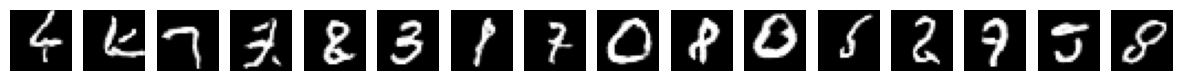

Epoch [21/100] | D Loss: 0.1363 G Loss: 3.6216
Epoch [22/100] | D Loss: 0.1380 G Loss: 2.8237
Epoch [23/100] | D Loss: 0.0785 G Loss: 3.6580
Epoch [24/100] | D Loss: 0.0386 G Loss: 5.3782
Epoch [25/100] | D Loss: 0.0245 G Loss: 4.7830
Epoch [26/100] | D Loss: 0.0756 G Loss: 3.9733
Epoch [27/100] | D Loss: 0.4787 G Loss: 2.0028
Epoch [28/100] | D Loss: 0.1110 G Loss: 4.4766
Epoch [29/100] | D Loss: 0.2900 G Loss: 3.4685
Epoch [30/100] | D Loss: 0.1798 G Loss: 3.7091


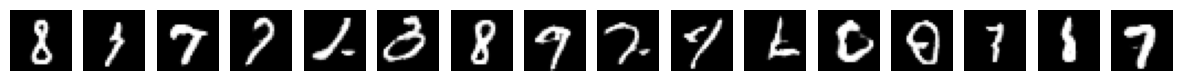

Epoch [31/100] | D Loss: 0.2837 G Loss: 3.6785
Epoch [32/100] | D Loss: 0.0365 G Loss: 4.9004
Epoch [33/100] | D Loss: 0.1644 G Loss: 4.3938
Epoch [34/100] | D Loss: 0.0350 G Loss: 4.9121
Epoch [35/100] | D Loss: 0.3927 G Loss: 1.8549
Epoch [36/100] | D Loss: 0.1451 G Loss: 5.2056
Epoch [37/100] | D Loss: 0.0371 G Loss: 4.3683
Epoch [38/100] | D Loss: 0.0509 G Loss: 4.4821
Epoch [39/100] | D Loss: 0.1043 G Loss: 3.2523
Epoch [40/100] | D Loss: 0.0118 G Loss: 5.8500


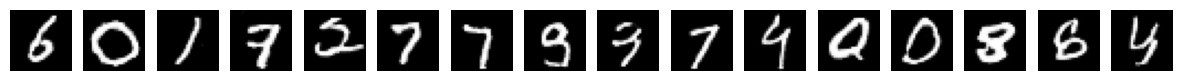

Epoch [41/100] | D Loss: 0.2246 G Loss: 3.8032
Epoch [42/100] | D Loss: 0.0385 G Loss: 8.7435
Epoch [43/100] | D Loss: 0.3915 G Loss: 2.1409
Epoch [44/100] | D Loss: 0.0258 G Loss: 6.0611
Epoch [45/100] | D Loss: 0.0806 G Loss: 4.7613
Epoch [46/100] | D Loss: 0.2089 G Loss: 4.8600
Epoch [47/100] | D Loss: 0.0362 G Loss: 6.1329
Epoch [48/100] | D Loss: 0.0633 G Loss: 4.1585
Epoch [49/100] | D Loss: 0.0330 G Loss: 5.6640
Epoch [50/100] | D Loss: 0.0954 G Loss: 4.3900


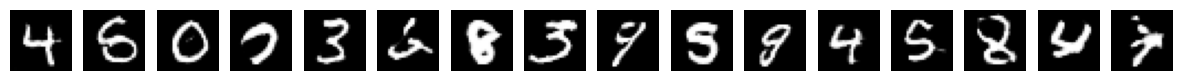

Epoch [51/100] | D Loss: 0.0606 G Loss: 5.1388
Epoch [52/100] | D Loss: 0.0370 G Loss: 6.4029
Epoch [53/100] | D Loss: 0.0301 G Loss: 4.9766
Epoch [54/100] | D Loss: 0.1540 G Loss: 7.1047
Epoch [55/100] | D Loss: 0.0768 G Loss: 4.5155
Epoch [56/100] | D Loss: 0.1123 G Loss: 5.3181
Epoch [57/100] | D Loss: 0.0518 G Loss: 4.7359
Epoch [58/100] | D Loss: 0.0939 G Loss: 4.5805
Epoch [59/100] | D Loss: 0.0201 G Loss: 5.1637
Epoch [60/100] | D Loss: 0.0059 G Loss: 6.5199


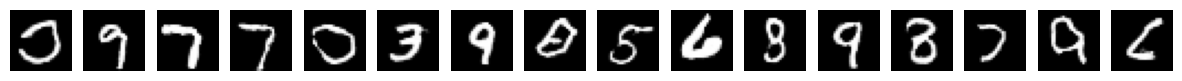

Epoch [61/100] | D Loss: 1.3051 G Loss: 9.8295
Epoch [62/100] | D Loss: 0.0039 G Loss: 7.2959
Epoch [63/100] | D Loss: 0.0082 G Loss: 9.2486
Epoch [64/100] | D Loss: 0.0116 G Loss: 5.8317
Epoch [65/100] | D Loss: 0.1004 G Loss: 4.7464
Epoch [66/100] | D Loss: 0.0125 G Loss: 6.1052
Epoch [67/100] | D Loss: 0.0481 G Loss: 4.6069
Epoch [68/100] | D Loss: 0.1481 G Loss: 4.3160
Epoch [69/100] | D Loss: 0.0193 G Loss: 5.5625
Epoch [70/100] | D Loss: 0.0979 G Loss: 4.7761


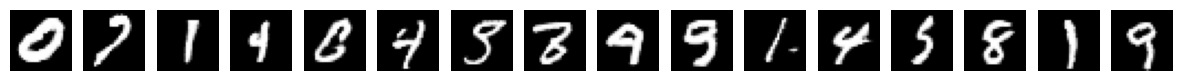

Epoch [71/100] | D Loss: 0.0787 G Loss: 4.9670
Epoch [72/100] | D Loss: 0.6934 G Loss: 11.2896
Epoch [73/100] | D Loss: 0.1632 G Loss: 4.0242
Epoch [74/100] | D Loss: 0.0613 G Loss: 4.5804
Epoch [75/100] | D Loss: 0.0430 G Loss: 5.1419
Epoch [76/100] | D Loss: 0.1642 G Loss: 6.0558
Epoch [77/100] | D Loss: 0.0142 G Loss: 7.2150
Epoch [78/100] | D Loss: 0.0220 G Loss: 5.8066
Epoch [79/100] | D Loss: 0.0242 G Loss: 5.1749
Epoch [80/100] | D Loss: 0.1432 G Loss: 4.3852


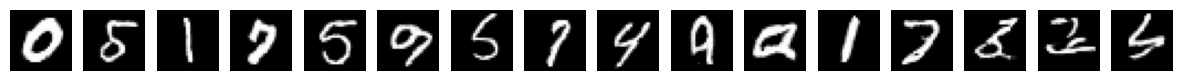

Epoch [81/100] | D Loss: 0.4012 G Loss: 8.5243
Epoch [82/100] | D Loss: 0.0287 G Loss: 5.0200
Epoch [83/100] | D Loss: 0.0684 G Loss: 5.8469
Epoch [84/100] | D Loss: 0.0148 G Loss: 6.1367
Epoch [85/100] | D Loss: 0.0195 G Loss: 5.0333
Epoch [86/100] | D Loss: 0.2566 G Loss: 4.5305
Epoch [87/100] | D Loss: 1.0416 G Loss: 8.6396
Epoch [88/100] | D Loss: 0.0214 G Loss: 5.5394
Epoch [89/100] | D Loss: 0.3143 G Loss: 6.1032
Epoch [90/100] | D Loss: 0.0219 G Loss: 6.6370


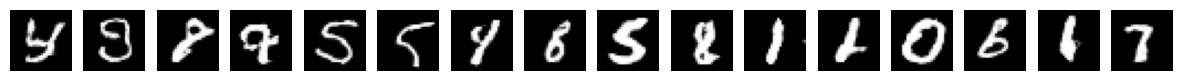

Epoch [91/100] | D Loss: 0.0566 G Loss: 3.8651
Epoch [92/100] | D Loss: 0.4852 G Loss: 1.1250
Epoch [93/100] | D Loss: 0.0599 G Loss: 8.6367
Epoch [94/100] | D Loss: 0.0495 G Loss: 4.8032
Epoch [95/100] | D Loss: 0.0073 G Loss: 5.6352
Epoch [96/100] | D Loss: 0.0653 G Loss: 4.9080
Epoch [97/100] | D Loss: 0.0657 G Loss: 6.3026
Epoch [98/100] | D Loss: 0.0211 G Loss: 5.5041
Epoch [99/100] | D Loss: 0.0418 G Loss: 7.4198
Epoch [100/100] | D Loss: 0.2940 G Loss: 5.0995


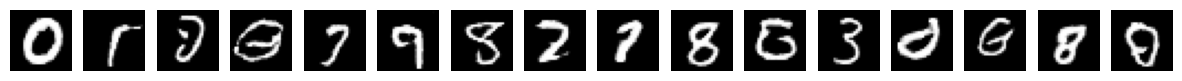

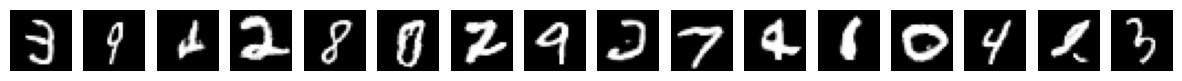

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Load and Prepare MNIST Dataset
# MNIST: data preprocessing
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,)) # Normalize to range [-1, 1]
])

# Load dataset
batch_size = 64
train_dataset = datasets.MNIST(root="./data", train=True, transform=transform, download=True)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Define the Generator (DCGAN Style)
# Replaced Linear layers with ConvTranspose2d layers
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        # Initial projection from latent_dim to a feature map size (e.g., 128 channels of 7x7)
        self.init_size = 7
        self.channels = 128
        self.l1 = nn.Sequential(nn.Linear(latent_dim, self.channels * self.init_size ** 2))

        self.conv_blocks = nn.Sequential(
            nn.BatchNorm2d(128),
            nn.Upsample(scale_factor=2), # Upsample to 14x14
            nn.Conv2d(128, 64, 3, stride=1, padding=1),
            nn.BatchNorm2d(64, 0.8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Upsample(scale_factor=2), # Upsample to 28x28
            nn.Conv2d(64, 32, 3, stride=1, padding=1),
            nn.BatchNorm2d(32, 0.8),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(32, 1, 3, stride=1, padding=1), # Output 1 channel
            nn.Tanh() # Output range [-1, 1]
        )

    def forward(self, z):
        out = self.l1(z)
        out = out.view(out.shape[0], self.channels, self.init_size, self.init_size) # Reshape to (Batch, 128, 7, 7)
        img = self.conv_blocks(out)
        return img

latent_dim = 100
device = "cuda" if torch.cuda.is_available() else "cpu"
generator = Generator(latent_dim).to(device)

# Define the Discriminator
# Replaced Linear layers with Conv2d layers
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            # Input: (1, 28, 28)
            nn.Conv2d(1, 32, 3, stride=2, padding=1), # -> (32, 14, 14)
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(32, 64, 3, stride=2, padding=1), # -> (64, 7, 7)
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 3, stride=2, padding=1), # -> (128, 4, 4) -- Adjusted for 28x28
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
        )

        # The height and width after the conv layers depend on padding/stride.
        # 28 -> 14 -> 7 -> 4. So final size is 128 * 4 * 4
        self.adv_layer = nn.Sequential(
            nn.Linear(128 * 4 * 4, 1),
            nn.Sigmoid()
        )

    def forward(self, img):
        out = self.model(img)
        out = out.view(out.shape[0], -1) # Flatten
        validity = self.adv_layer(out)
        return validity

discriminator = Discriminator().to(device)

# Define Loss Function and Optimizers
criterion = nn.BCELoss()

# DCGAN usually works better with slightly different Adam parameters
lr = 0.0002
generator_optimizer = optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))

# Training the loop
def train_gan(generator, discriminator, train_loader, epochs, latent_dim):
    print(f"Starting training on {device}")
    for epoch in range(epochs):
        for i, (real_images, _) in enumerate(train_loader):
            batch_size = real_images.size(0)
            real_images = real_images.to(device)

            # Labels
            real_labels = torch.ones(batch_size, 1).to(device)
            fake_labels = torch.zeros(batch_size, 1).to(device)

            #  Train Discriminator
            discriminator_optimizer.zero_grad()

            # Loss for real images
            real_outputs = discriminator(real_images)
            real_loss = criterion(real_outputs, real_labels)

            # Generate fake images
            noise = torch.randn(batch_size, latent_dim).to(device)
            fake_images = generator(noise)

            # Loss for fake images
            fake_outputs = discriminator(fake_images.detach())
            fake_loss = criterion(fake_outputs, fake_labels)

            # Total Discriminator loss
            d_loss = real_loss + fake_loss
            d_loss.backward()
            discriminator_optimizer.step()

            # Train Generator
            generator_optimizer.zero_grad()

            # Generate fake images and calculate loss
            fake_outputs = discriminator(fake_images)
            g_loss = criterion(fake_outputs, real_labels) # Fool the discriminator

            g_loss.backward()
            generator_optimizer.step()

        # Print losses for the current epoch
        print(f"Epoch [{epoch+1}/{epochs}] | D Loss: {d_loss.item():.4f} G Loss: {g_loss.item():.4f}")

        # Visualize generated images
        if (epoch + 1) % 10 == 0:
            visualize_images(generator, latent_dim)

# Visualization Function
def visualize_images(generator, latent_dim, num_images=16):
    generator.eval()
    with torch.no_grad(): # Good practice to turn off grad for inference
        noise = torch.randn(num_images, latent_dim).to(device)
        generated_images = generator(noise).detach().cpu()

    # Plot Images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    # Handle single image case
    if num_images == 1:
        axes = [axes]

    for i in range(num_images):
        axes[i].imshow(generated_images[i].squeeze(), cmap="gray")
        axes[i].axis("off")
    plt.show()
    generator.train()

# Run the Training

epochs = 100
train_gan(generator, discriminator, train_loader, epochs, latent_dim)

# Generate and Visualize New Images (Post-Training)
def generate_images(generator, latent_dim, num_images=16):
    generator.eval()
    with torch.no_grad():
        noise = torch.randn(num_images, latent_dim).to(device)
        generated_images = generator(noise).detach().cpu()

    # Plot images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 15))
    if num_images == 1:
        axes = [axes]

    for i in range(num_images):
        axes[i].imshow(generated_images[i].squeeze(), cmap="gray")
        axes[i].axis("off")
    plt.show()

#   Generate images
generate_images(generator, latent_dim)

For the final task I am using my custom made cat annotated data that I build in previous tutorial of object detection tutorials

---
Changed grayscale size from 28 to 64. At first the epochs were kept 50 for testing the results were not so good so changed epochs to 100. To prevent overfitting of small dataset updated simple normalization to robust augmentation.
The generator architecture was switched to pure transposed convolution (DCGAN) creating a deeper network of 512 filters to handle color images. The discriminatro architecture was also replaced with Fully convolutional output

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using device: cuda
Successfully loaded 151 images from /content/drive/MyDrive/Cat/images
Starting Training Loop
Epoch [1/200] Loss D: 0.7346 Loss G: 4.7255
Epoch [2/200] Loss D: 0.5611 Loss G: 6.1160
Epoch [3/200] Loss D: 0.2660 Loss G: 6.2739
Epoch [4/200] Loss D: 0.3359 Loss G: 8.5635
Epoch [5/200] Loss D: 0.2203 Loss G: 10.7968
Epoch [6/200] Loss D: 0.3434 Loss G: 14.0351
Epoch [7/200] Loss D: 1.4174 Loss G: 13.6843
Epoch [8/200] Loss D: 0.0883 Loss G: 9.3011
Epoch [9/200] Loss D: 0.1815 Loss G: 10.5853
Epoch [10/200] Loss D: 0.8914 Loss G: 16.3744
Epoch [11/200] Loss D: 0.0107 Loss G: 7.9993
Epoch [12/200] Loss D: 0.0915 Loss G: 15.1863
Epoch [13/200] Loss D: 1.0809 Loss G: 15.2319
Epoch [14/200] Loss D: 0.0975 Loss G: 12.7089
Epoch [15/200] Loss D: 0.0972 Loss G: 17.0609
Epoch [16/200] Loss D: 0.0260 Loss G: 13.1862
Epoch [17/200] Loss D: 1.0298 Loss G: 

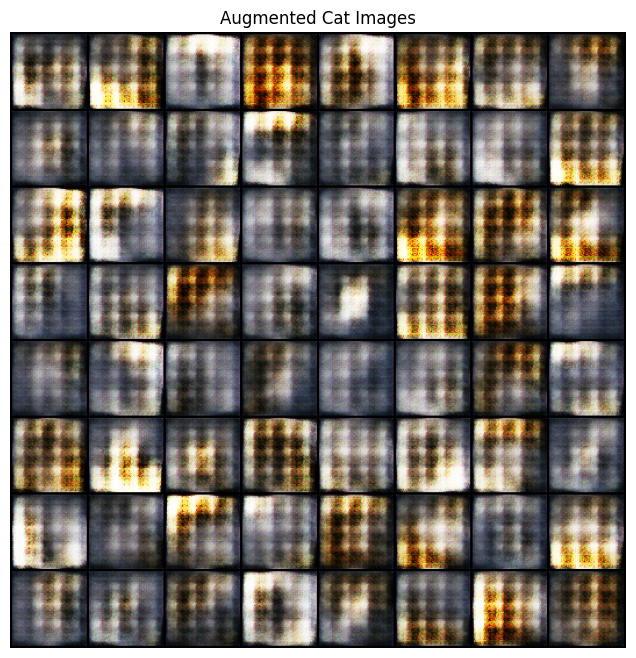

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
from torch.utils.data import Dataset, DataLoader
from google.colab import drive

# 1. Mount Google Drive
drive.mount('/content/drive')

# 2. Configuration & Device Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Hyperparameters
batch_size = 64        # Reduced slightly to be safe with memory
lr = 0.0002
beta1 = 0.5
z_dim = 100            # Size of the random noise vector
num_epochs = 200       # Increased epochs because training on custom data takes time
image_size = 64        # We will resize all cat images to 64x64

# 3. Custom Data Loader
class CustomCatDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        # Only load .jpg, .png, .jpeg files
        self.image_files = [f for f in os.listdir(root_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.image_files[idx])
        image = Image.open(img_name).convert('RGB') # Convert to RGB (3 channels)

        if self.transform:
            image = self.transform(image)

        return image, 0 # Dummy label

# Define transforms (Resize is CRITICAL here to make all images same size)
transform = transforms.Compose([
    transforms.Resize((64, 64)),           # Resize first
    transforms.RandomHorizontalFlip(p=0.5),# Randomly flip left/right
    transforms.RandomRotation(10),         # Slight rotations (+/- 10 degrees)
    transforms.ColorJitter(brightness=0.1, contrast=0.1), # Slight color variation
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

data_path = '/content/drive/MyDrive/Cat/images'

try:
    dataset = CustomCatDataset(root_dir=data_path, transform=transform)
    dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
    print(f"Successfully loaded {len(dataset)} images from {data_path}")
except FileNotFoundError:
    print(f"Error: Could not find path {data_path}. Please check your Drive folders.")

# 4. Define the Generator
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Input is Z, going into a convolution
            nn.ConvTranspose2d(z_dim, 512, 4, 1, 0, bias=False),
            nn.BatchNorm2d(512),
            nn.ReLU(True),

            nn.ConvTranspose2d(512, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.ReLU(True),

            nn.ConvTranspose2d(256, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.ReLU(True),

            nn.ConvTranspose2d(128, 64, 4, 2, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(True),

            # Output layer: 3 channels for RGB images
            nn.ConvTranspose2d(64, 3, 4, 2, 1, bias=False),
            nn.Tanh()
        )

    def forward(self, input):
        return self.main(input)

# 5. Define the Discriminator
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.main = nn.Sequential(
            # Input is 3 channels (RGB)
            nn.Conv2d(3, 64, 4, 2, 1, bias=False),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(64, 128, 4, 2, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(128, 256, 4, 2, 1, bias=False),
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(256, 512, 4, 2, 1, bias=False),
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            nn.Conv2d(512, 1, 4, 1, 0, bias=False),
            nn.Sigmoid()
        )

    def forward(self, input):
        return self.main(input)

# Initialize Models
netG = Generator().to(device)
netD = Discriminator().to(device)

# Loss and Optimizers
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=lr, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=lr, betas=(beta1, 0.999))

# 6. Training Loop
print("Starting Training Loop")

for epoch in range(num_epochs):
    for i, data in enumerate(dataloader, 0):

        # Train Discriminator
        netD.zero_grad()
        real_cpu = data[0].to(device)
        b_size = real_cpu.size(0)
        label = torch.full((b_size,), 1.0, device=device)
        output = netD(real_cpu).view(-1)
        errD_real = criterion(output, label)
        errD_real.backward()

        noise = torch.randn(b_size, z_dim, 1, 1, device=device)
        fake = netG(noise)
        label.fill_(0.0)
        output = netD(fake.detach()).view(-1)
        errD_fake = criterion(output, label)
        errD_fake.backward()
        optimizerD.step()

        # Train Generator
        netG.zero_grad()
        label.fill_(1.0)
        output = netD(fake).view(-1)
        errG = criterion(output, label)
        errG.backward()
        optimizerG.step()

    # Print status every epoch
    print(f'Epoch [{epoch+1}/{num_epochs}] Loss D: {errD_real.item() + errD_fake.item():.4f} Loss G: {errG.item():.4f}')

# 7. Visualizing Results
with torch.no_grad():
    fake = netG(torch.randn(64, z_dim, 1, 1, device=device)).detach().cpu()
    plt.figure(figsize=(8,8))
    plt.axis("off")
    plt.title("Augmented Cat Images")
    plt.imshow(np.transpose(torchvision.utils.make_grid(fake, padding=2, normalize=True), (1,2,0)))
    plt.show()